In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train , y_train) , (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_mean = np.mean(x_train , axis= (0,1,2))
x_std = np.std(x_train , axis = (0,1,2))

In [6]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.3 , random_state=777)


In [7]:
y_train.shape

(35000, 1)

In [8]:
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

In [9]:
y_train.shape

(35000,)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip = True ,
                  zoom_range=0.2,
                  width_shift_range=0.1,
                  height_shift_range = 0.1,
                  rotation_range = 30,
                  fill_mode = 'nearest')

val_datagen = ImageDataGenerator()
batch_size = 32
train_generator = train_datagen.flow(x_train , y_train , batch_size = batch_size)
val_generator = val_datagen.flow(x_val , y_val , batch_size = batch_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Flatten , BatchNormalization , Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights = 'imagenet' , input_shape = (32,32,3) , include_top = False)
vgg16.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [13]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [14]:
model.compile('adam' , 'sparse_categorical_crossentropy' , ['acc'])
def get_step(train_len , batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else :
    return train_len // batch_size
history = model.fit(train_generator , epochs = 50 , steps_per_epoch=get_step(len(x_train), batch_size), validation_data=val_generator, validation_steps=get_step(len(x_val), batch_size))

Epoch 1/50
1094/1094 [==============================] - 54s 36ms/step - loss: 1.9103 - acc: 0.2378 - val_loss: 2.1040 - val_acc: 0.2895
Epoch 2/50
1094/1094 [==============================] - 39s 36ms/step - loss: 1.6341 - acc: 0.3536 - val_loss: 1.8291 - val_acc: 0.3294
Epoch 3/50
1094/1094 [==============================] - 37s 34ms/step - loss: 1.4961 - acc: 0.4166 - val_loss: 1.4788 - val_acc: 0.4631
Epoch 4/50
1094/1094 [==============================] - 37s 34ms/step - loss: 1.3991 - acc: 0.4705 - val_loss: 1.6793 - val_acc: 0.4775
Epoch 5/50
1094/1094 [==============================] - 37s 34ms/step - loss: 1.2221 - acc: 0.5536 - val_loss: 1.7913 - val_acc: 0.4798
Epoch 6/50
1094/1094 [==============================] - 37s 34ms/step - loss: 1.0767 - acc: 0.6181 - val_loss: 0.9410 - val_acc: 0.6701
Epoch 7/50
1094/1094 [==============================] - 37s 34ms/step - loss: 0.9974 - acc: 0.6495 - val_loss: 0.8302 - val_acc: 0.7141
Epoch 8/50
1094/1094 [==========================

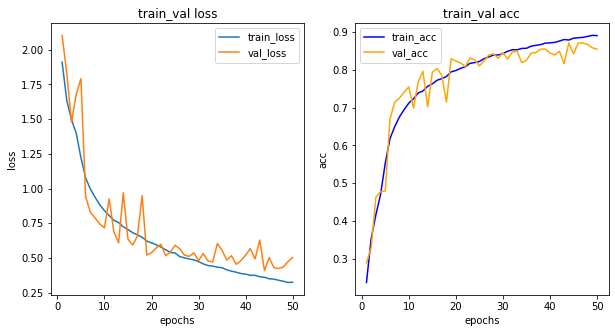

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,  label = 'train_loss')
ax1.plot(epochs, val_loss,  label = 'val_loss')
ax1.set_title('train_val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = history.history['acc']
val_acc = history.history['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color='orange' , label = 'val_acc')
ax2.set_title('train_val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

#plt.savefig('[13]VGG16_app(신승일).png')

In [16]:
plt.savefig('[13]VGG16_app(신승일).png')

<Figure size 432x288 with 0 Axes>